In [1]:
from numpy import *
from matplotlib import pyplot as plt
import csv
from datetime import datetime as DT

# data plotting
not easy to get data from origin right now. try to set up remote connection to mysql database

In [2]:
def read_csv(fname,delim = '\t',newline=''):
    """
    return (labels,data) in fname
    """
    labels = []
    data = []
    with open(fname, 'r', newline=newline) as f:
        reader = csv.reader(f, delimiter=delim)
        labels = reader.__next__()
        for row in reader:
            try:
                data.append(array([float(x) for x in row]))
#                 data.append(row)
            except (ValueError,TypeError) as e:
                print(e)
                print(f"problematic row: {row}")
                break

    return data, labels
def plot_multi_line(xpts,ypts_list,plt_kwargs_list,slices=None,ax=None,yunits=1,yfunc=None,
                   scatter=False):
    """
    plot each list-like of ypts in yptslist vs xpts
    return an ax object
    
    slices is tuple of indices used to select a chunk of data, e.g. slices=[0,-1] gets all 
    the data.
    """
    
    if type(yunits) == list:
        yunits_list = yunits
    else:
        yunits_list = [yunits]*len(ypts_list)
    
    if slices != None:
        xpts = xpts[slices[0]:slices[1]]
    if ax == None:
        fig,ax = plt.subplots()
    for ypts,kwargs,yunit in zip(ypts_list,plt_kwargs_list,yunits_list):
        if slices != None:
            ypts = ypts[slices[0]:slices[1]]
        if yfunc != None:
            ypts = yfunc(array(ypts)) # apply a function element-wise to the ypts
        if not scatter:
            ax.plot(xpts,ypts*yunit,**kwargs)
        else:
            ax.scatter(xpts,ypts*yunit,**kwargs)
    if "label" in plt_kwargs_list[0]:
        ax.legend()
    
    return ax

def scatter_multi_line(xpts,ypts_list,plt_kwargs_list,slices=None,ax=None,yunits=1,yfunc=None):
    """
    TODO: set docstring = to that of plot_multi_line 
    """

    return plot_multi_line(xpts,ypts_list,plt_kwargs_list,slices,ax,yunits,yfunc,scatter=True)
    
percentage_change = lambda x: 100*(x - mean(x))/abs(max(x))
variance = lambda x: x - mean(x)
to_unix = lambda x: x/2**32
from_unix = lambda x: x*2**32
dt_to_unix = lambda x: (x - DT(1970,1,1)).total_seconds() 

# TIME IS FAST IN ORIGIN BY 6 HOURS. offset in the unix time:
unix_to_dt = lambda x: DT.utcfromtimestamp(x-6*3600).strftime(
    '%Y-%m-%d %H:%M:%S')
unix_to_date = lambda x,sym: DT.utcfromtimestamp(x-6*3600).strftime(
    '%Y'+sym+'%m'+sym+'%d')
unix_to_hrmin = lambda x,sym: DT.utcfromtimestamp(x-6*3600).strftime('%H'+sym+'%M')
unix_to_dayhrmin = lambda x: DT.utcfromtimestamp(x-6*3600).strftime('%m-%d, %H:%M')

In [8]:
# last time step in sql:
6926271587366279168
linspace(-0.478,-0.142,11) # xscan
linspace(-.297,-0.097,11) # yscan
linspace(-0.093, -0.005, 11) # zscan
6927817978796331008


# timestep morning of 15 feb 21
6929519166227861504

6929519166227861504

In [24]:
unix_to_dt(to_unix((dt_to_unix(DT(2021,2,24,16,0)) + 6*3600)*2**32))
int((dt_to_unix(DT(2021,2,24,16,0)) + 6*3600)*2**32)

6932953389072384000

In [ ]:
(dt - datetime(1970,1,1)).total_seconds()

In [40]:
unix_to_dt(to_unix(6930645969873454080)), unix_to_dt(to_unix(6930719147085004800))

('2021-02-18 10:46:02', '2021-02-18 15:30:00')

## 2020.02.24

In [44]:
files = ["rb_coils20210224_25_945.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows, = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1] #,datatuples[1][1]

['measurement_time',
 '3D_X',
 '3D_Y',
 '3D_Z',
 '3D_Q2',
 '3D_Q1',
 '2D_Y2',
 '2D_Y1',
 '2D_X1',
 '2D_X2']

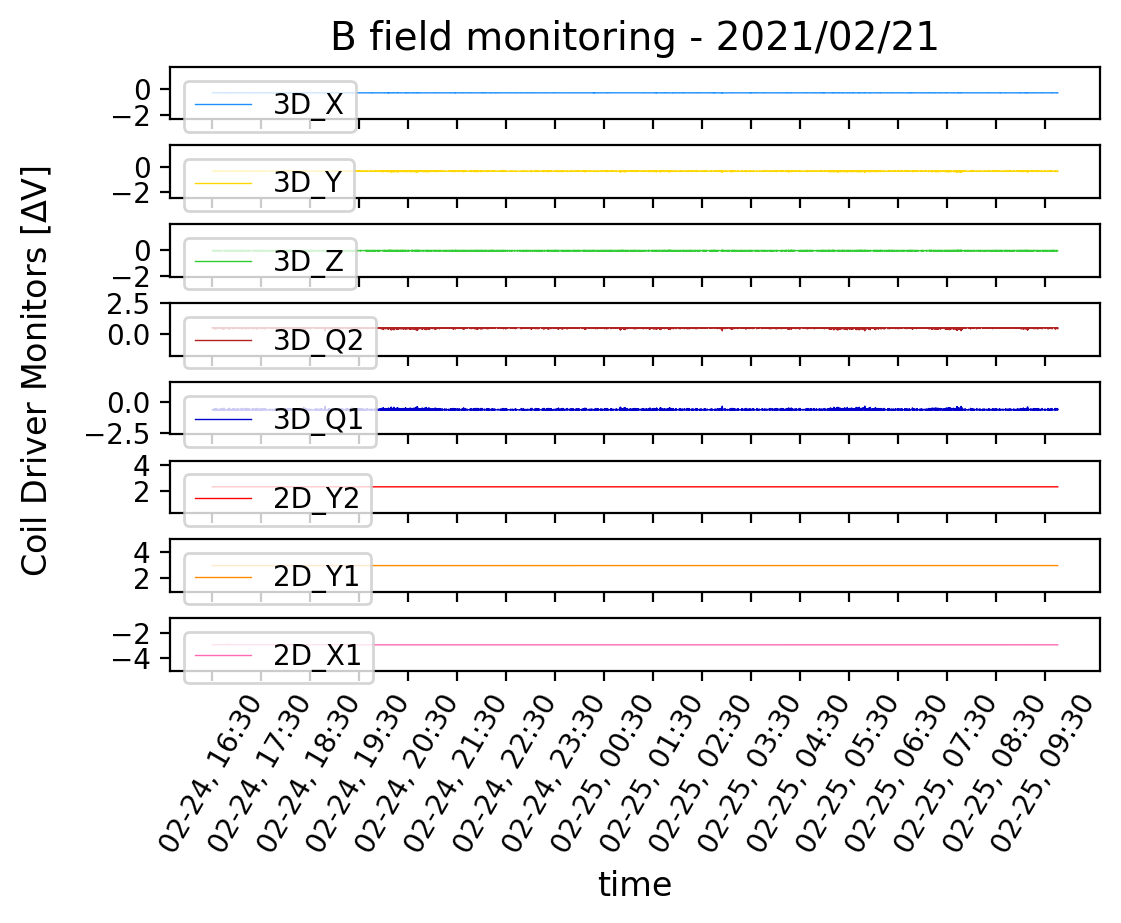

In [71]:
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','red','darkorange','hotpink','slateblue']
fig,axes = plt.subplots(len(colors[:-1]),1,dpi=200,sharex=True)
plt.subplots_adjust(hspace = 0.5)
legfontsize = 7
widths = [0.5]*len(colors)
ydatarows = coilrows[1:-1]# + [3:5]
labels = datatuples[0][1][1:]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 3600
units = 1#[2370,9000] # mG per V at atoms 

slicy=[0, 41500]
# slicy=[0,-1]

xticks = [xdata[slicy[-1]] + xstep*i for i in range(int((xdata[slicy[0]]-xdata[slicy[-1]])/xstep+1))]

for ydata,ax,c,l,lw in zip(ydatarows,axes,colors,labels,widths):
    plt_kwargs = [{"color":c,"label":l,"linewidth":lw}]
    plot_multi_line(xdata,[ydata],plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
    ax.legend(loc='upper left')
    ymin,ymax = ax.get_ylim()
    ax.set_ylim((ymin-2,ymax+2))
#     ax.axvspan(xdata[9547],xdata[59774], alpha=0.1, color='red')
axes[0].set_title(f"B field monitoring - 2021/02/21",fontsize=14) #{unix_to_date(xdata[slicy[0]],'/')}
axes[-1].set_xlabel("time",fontsize=12)
axes[-1].set_xticks(xticks)
axes[-1].set_xticklabels([unix_to_dayhrmin(x) for x in xticks], rotation=60)
fig.text(0.0, 0.5, r"Coil Driver Monitors [$\Delta$V]",fontsize=12, va='center', rotation='vertical')

# fname = "coils_deltavoltage_subplots_20210221.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

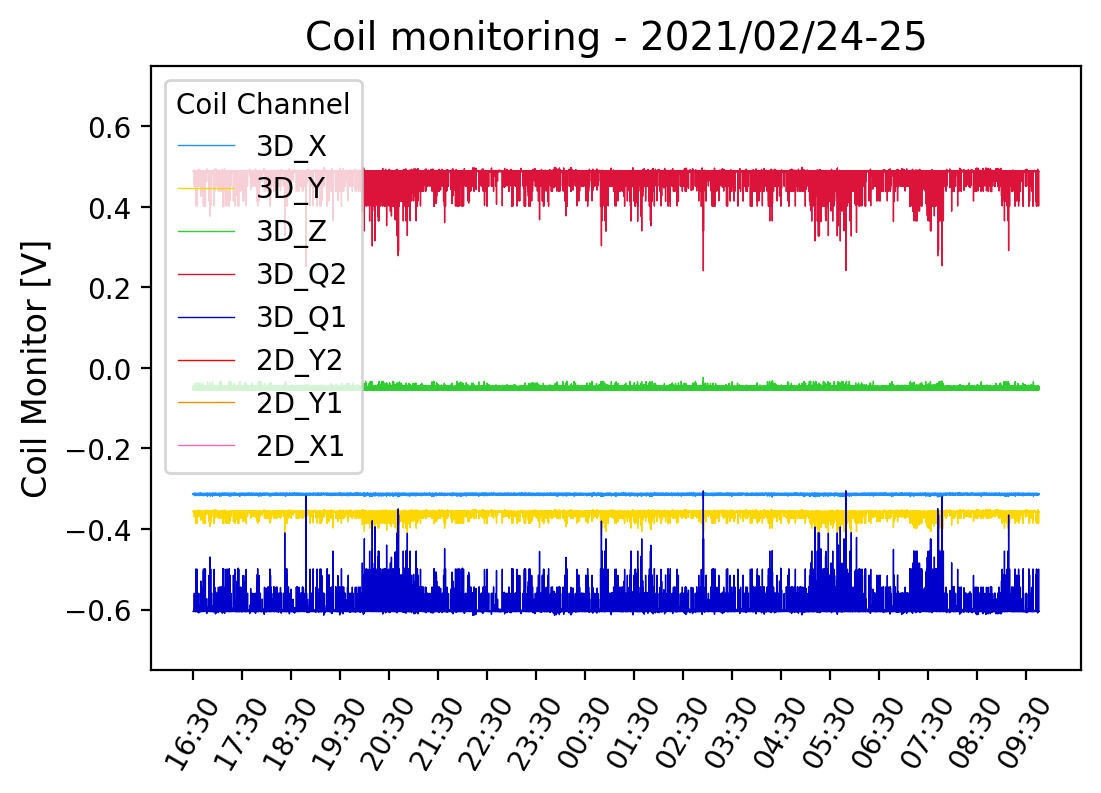

In [80]:
fig,ax = plt.subplots(1,1,dpi=200)
legfontsize = 10
colors = ['dodgerblue','gold','limegreen','crimson','mediumblue','red','darkorange','hotpink','forestgreen']
widths = [0.5]*len(colors)
ydatarows = coilrows[1:-1]# + [3:5]
labels = datatuples[0][1][1:]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 3600
units = 1#[2370,9000] # mG per V at atoms 

slicy=[0, 41500]
# slicy=[0,-1]

xticks = [xdata[slicy[-1]] + xstep*i for i in range(int((xdata[slicy[0]]-xdata[slicy[-1]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"Coil monitoring - {unix_to_date(xdata[slicy[-1]],'/')}-25",fontsize=14)
ax.set_ylabel(r"Coil Monitor [V]",fontsize=12)
ax.set_ylim((-0.75,0.75))

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax2.set_ylim((-20,20))

ax.legend(title="Coil Channel", loc='upper left', fontsize=legfontsize)
# ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

# fname = "coils_20210224_25_945_zoomed.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [47]:
len(xdata)

42720

In [40]:
[x,y[0] for y in ydatarows]

[-0.311743,
 -0.357637,
 -0.0538887,
 0.488162,
 -0.60466,
 2.30531,
 2.95998,
 -2.95038,
 -0.0513478]

In [30]:
len(xdata)

10433

## 2020.02.22

In [4]:
files = ["rb_coils20210222.csv", "rb_fields20210222.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows,senserows = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1] #,datatuples[1][1]

['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2']

2021-02-22 20:57:31 2021-02-20 14:30:00


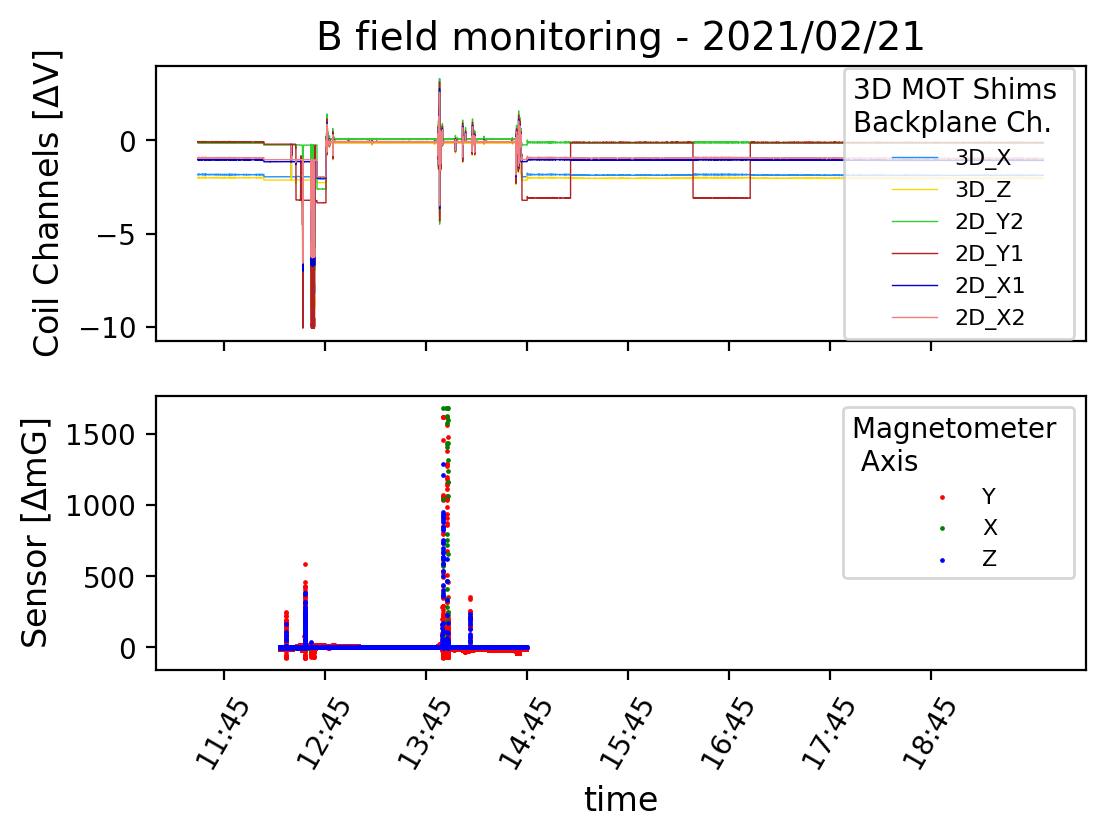

In [17]:
## subplotify
fig,(ax,ax2) = plt.subplots(2,1,dpi=200,sharex=True)
legfontsize = 8
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
# colors = ['royalblue','green']
labels = datatuples[0][1][1:]
widths = [0.5]*len(colors)
ydatarows = coilrows[1:]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata1 = to_unix(coilrows[0])
xstep = 3600
units = 1 #[2370,9000] # mG per V at atoms 

slicy =[60000,80000]

xticks = [xdata1[slicy[0]] + xstep*i for i in range(int((xdata1[slicy[0]]-xdata1[slicy[-1]])/xstep+1))]
print(unix_to_dt(xdata1[0]), unix_to_dt(xdata1[-1]))
plot_multi_line(xdata1,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata1[slicy[-1]],'/')}",fontsize=14)
ax.set_ylabel(r"Coil Channels [$\Delta$V]",fontsize=12)
# ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
slicy = [0,-1]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)


ax2.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
# ax2.set_xticks(xticks)
xticks = [xdata[slicy[0]] + xstep*i for i in range(-3,int((xdata[slicy[0]]-xdata[slicy[-1]])/xstep+3))]
ax2.set_xticks(xticks)
ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60) #+13*3600
# ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=12)
# ax2.set_ylim((-20,20))

ax.legend(title="3D MOT Shims \nBackplane Ch.", loc='center right', fontsize=legfontsize)
ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

# fname = "coils_sensor_20210222_zoomed.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

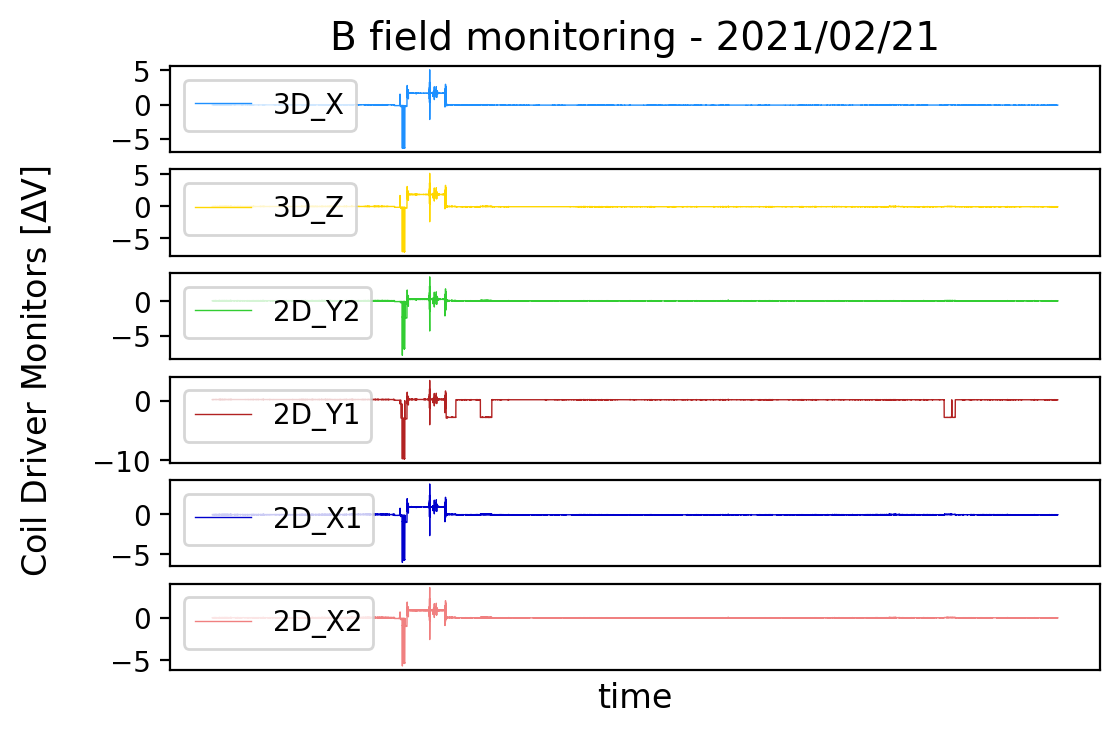

In [23]:
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
fig,axes = plt.subplots(len(colors),1,dpi=200,sharex=True)

labels = ['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
labels = datatuples[0][1][1:]
widths = [0.5]*len(colors)
ydatarows = coilrows[1:]
xdata = to_unix(coilrows[0])
xstep = 4*3600
units = 1 #[2370,9000] # mG per V at atoms 

slicy=[0, 100000]
# slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
for ydata,ax,c,l,lw in zip(ydatarows,axes,colors,labels,widths):
    plt_kwargs = [{"color":c,"label":l,"linewidth":lw}]
    plot_multi_line(xdata,[ydata],plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
    ax.legend(loc='upper left')
#     ax.axvspan(xdata[9547],xdata[59774], alpha=0.1, color='red')
axes[0].set_title(f"B field monitoring - 2021/02/21",fontsize=14) #{unix_to_date(xdata[slicy[0]],'/')}
axes[-1].set_xlabel("time",fontsize=12)
axes[-1].set_xticks(xticks)
axes[-1].set_xticklabels([unix_to_dayhrmin(x) for x in xticks], rotation=60)
fig.text(0.0, 0.5, r"Coil Driver Monitors [$\Delta$V]",fontsize=12, va='center', rotation='vertical')

# fname = "coils_deltavoltage_subplots_20210221.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [21]:
unix_to_dt(xticks[0]), unix_to_dt(xticks[-1])

('2021-02-22 20:57:31', '2021-02-24 20:57:31')

In [13]:
unix_to_dt(xdata1[slicy[0]]), unix_to_dt(xdata1[slicy[-1]]) 

('2021-02-22 20:57:31', '2021-02-20 14:30:00')

In [51]:
unix_to_dt(xticks[0]),unix_to_dt(xticks[-1])

('2021-02-22 20:57:31', '2021-02-25 00:57:31')

In [7]:
len(xdata1)

130250

## 2020.02.19

In [111]:
files = ["rb_coils20210219_1149.csv","rb_bfields20210219_1149.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows,senserows = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1],datatuples[1][1]

(['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2'],
 ['measurement_time', '1', '0', '2'])

In [113]:
powerrows = coilrows[3:5]
coilrows = concatenate((coilrows[:3],coilrows[5:]))
coillabels = list(datatuples[0][1])
powerlabels = [coillabels.pop(i) for i in [4,3]]

['2D_X1' '2D_X2' '2D_Y1' '2D_Y2' '3D_X' '3D_Z']


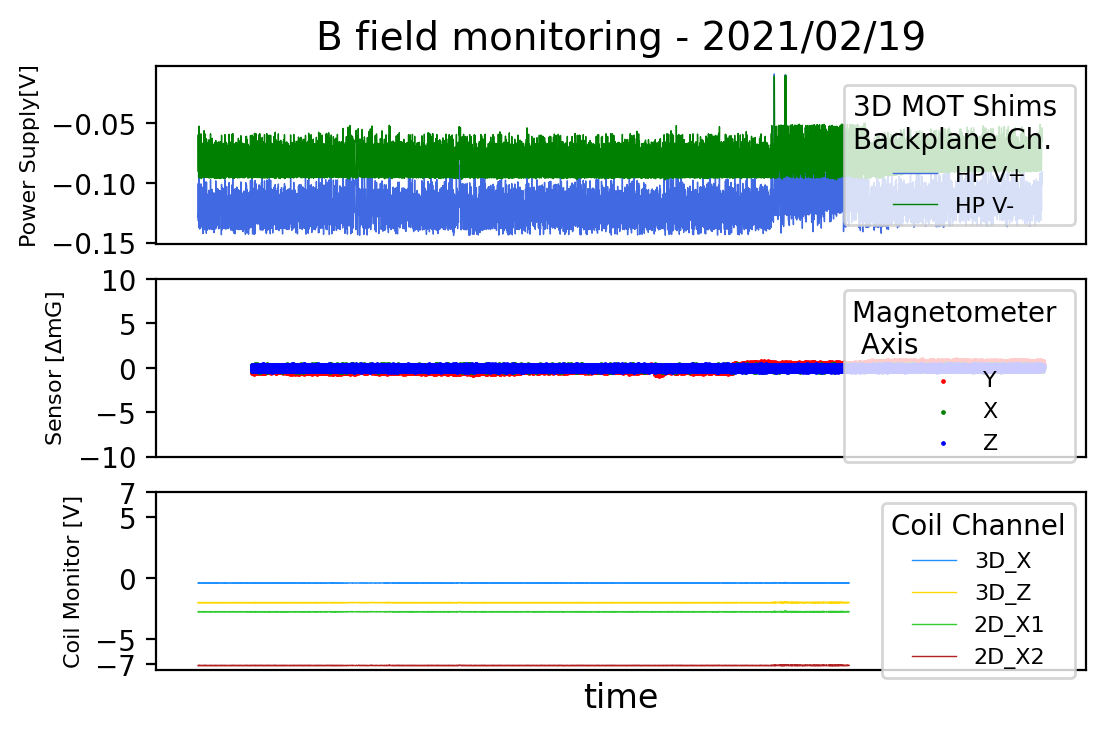

In [114]:
## subplotify
fig,(ax,ax2,ax3) = plt.subplots(3,1,dpi=200,sharex=True)
yfontsize = 8
legfontsize = 8
colors = ['royalblue','green']
labels = ['HP V+', 'HP V-']
widths = [0.5]*len(colors)
# ydatatuples = list(zip(coilrows[1:], labels))
# ydatarows1,labels1 = array(sorted(ydatatuples, key=lambda x: x[1])).T
print(labels1)

ydatarows = powerrows
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 2*3600
units = 1 #[2370,9000] # mG per V at atoms 

# slicy1=[1100,-1]#20000]
# slicy=slicy1
slicy = [0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Power Supply[V]",fontsize=yfontsize)
# ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
# slicy = [30000,-1]
slicy = [0,-1]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)

# ax2.set_xlabel("time",fontsize=12)
# # ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
# ax2.set_xticks(xticks)
# ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# # ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=yfontsize)
ax2.set_yticks([-10,-5,0,5,10])
# ax2.set_ylim((-20,20))

ax.legend(title="3D MOT Shims \nBackplane Ch.", loc='center right', fontsize=legfontsize)
ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

colors = ['dodgerblue','gold','limegreen','firebrick']#,'mediumblue','lightcoral']
labels = coillabels[1:] #['3D_X', 'HP V+', '3D_Z', 'HP V-', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
# ydatatuples = list(zip(coilrows[1:], labels))
# ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1]),dtype=object).T
ydatarows = coilrows[1:]
widths = [0.5]*len(colors)

# assert len(colors) == len(labels)
# assert len(labels) ==len(widths)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 3600/12
units = 1 #[2370,9000] # mG per V at atoms 

slicy=slicy1
# slicy = [0,-1]

plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax3,yunits=units)#,yfunc=variance)#percentage_change)
ax3.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax3.set_xticks(xticks)
ax3.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
ax3.set_ylabel(r"Coil Monitor [V]",fontsize=yfontsize)
# ax.set_ylim((-1,1))
ax3.legend(title="Coil Channel", loc='upper right', fontsize=legfontsize)
ax3.set_yticks([-7,-5,0,5,7])


# fname = "3Dcoilpower_bsensor_2Dy1y2_3Dxz_20210218_839_939.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [90]:
files = ["rb_coils20210219_950.csv","rb_bfields20210219_950.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows,senserows = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1],datatuples[1][1]

(['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2'],
 ['measurement_time', '1', '0', '2'])

In [91]:
powerrows = coilrows[3:5]
coilrows = concatenate((coilrows[:3],coilrows[5:]))
coillabels = list(datatuples[0][1])
powerlabels = [coillabels.pop(i) for i in [4,3]]

In [87]:
coillabels, powerlabels

(['measurement_time', '3D_X', '3D_Z', '2D_X1', '2D_X2'], ['2D_Y1', '2D_Y2'])

In [92]:
shape(powerrows)

(2, 28702)

['2D_X1' '2D_X2' '2D_Y1' '2D_Y2' '3D_X' '3D_Z']


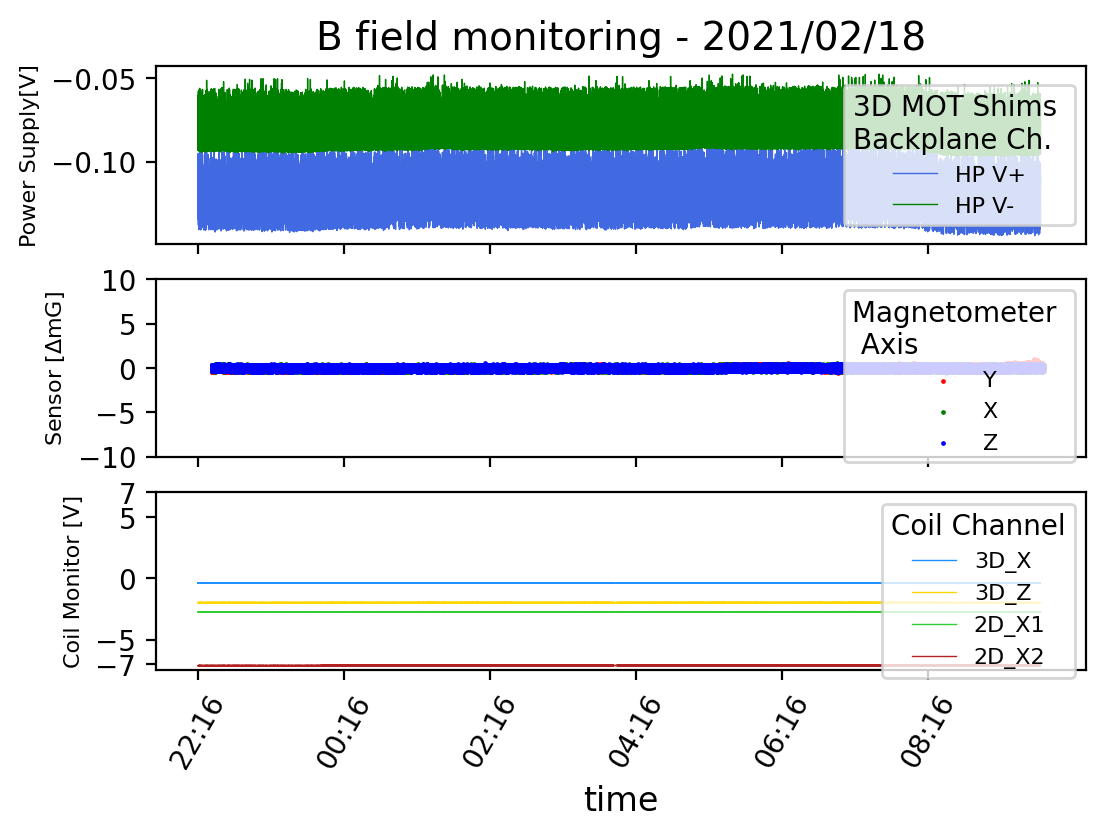

In [110]:
## subplotify
fig,(ax,ax2,ax3) = plt.subplots(3,1,dpi=200,sharex=True)
yfontsize = 8
legfontsize = 8
colors = ['royalblue','green']
labels = ['HP V+', 'HP V-']
widths = [0.5]*len(colors)
# ydatatuples = list(zip(coilrows[1:], labels))
# ydatarows1,labels1 = array(sorted(ydatatuples, key=lambda x: x[1])).T
print(labels1)

ydatarows = powerrows
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 2*3600
units = 1 #[2370,9000] # mG per V at atoms 

slicy1=[1100,-1]#20000]
slicy=slicy1
# slicy = [0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Power Supply[V]",fontsize=yfontsize)
# ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
slicy = [30000,-1]
# slicy = [0,-1]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)

# ax2.set_xlabel("time",fontsize=12)
# # ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
# ax2.set_xticks(xticks)
# ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# # ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=yfontsize)
ax2.set_yticks([-10,-5,0,5,10])
# ax2.set_ylim((-20,20))

ax.legend(title="3D MOT Shims \nBackplane Ch.", loc='center right', fontsize=legfontsize)
ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

colors = ['dodgerblue','gold','limegreen','firebrick']#,'mediumblue','lightcoral']
labels = coillabels[1:] #['3D_X', 'HP V+', '3D_Z', 'HP V-', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
# ydatatuples = list(zip(coilrows[1:], labels))
# ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1]),dtype=object).T
ydatarows = coilrows[1:]
widths = [0.5]*len(colors)

# assert len(colors) == len(labels)
# assert len(labels) ==len(widths)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 3600/12
units = 1 #[2370,9000] # mG per V at atoms 

slicy=slicy1
# slicy = [0,-1]

plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax3,yunits=units)#,yfunc=variance)#percentage_change)
ax3.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax3.set_xticks(xticks)
ax3.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
ax3.set_ylabel(r"Coil Monitor [V]",fontsize=yfontsize)
# ax.set_ylim((-1,1))
ax3.legend(title="Coil Channel", loc='upper right', fontsize=legfontsize)
ax3.set_yticks([-7,-5,0,5,7])


# fname = "3Dcoilpower_bsensor_2Dy1y2_3Dxz_20210218_839_939.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

## 2020.02.18

In [ ]:
# last time 20:45.  6930348061910630400 and 6930645969873454080


# loading in FORT, but < 10%
# 3:09 PM (15:09):
# Y1,Y2 now V+/- on the 2D Shim backplane
# others on their resp. monitors. no experiment during this time, not even cycling.
# now start over experiment, check for loading.
# getting loading, still < 10% (6%). comparable to above stats over long enough time,
# maybe worse. check field data later. 5% loading around 3:30.

In [33]:
files = ["rb_coils20210218_2109.csv"] #,"rb_bfields_20210218.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows, = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1] #, datatuples[1][1]

['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2']

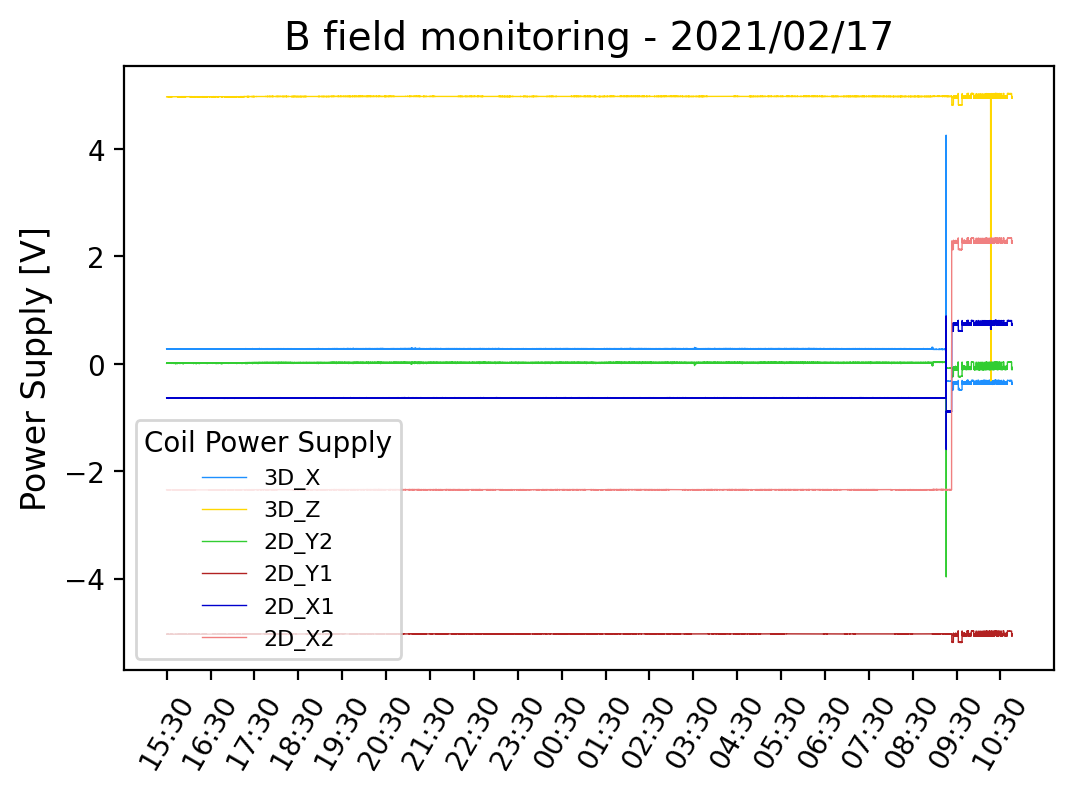

In [35]:
## subplotify
fig,ax = plt.subplots(1,1,dpi=200)
legfontsize = 8
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
# colors = ['yellow','green']
# labels = ['3D_X', 'HP V+', '3D_Z', 'HP V-', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
ydatarows = coilrows[1:]# [3:5]
labels = datatuples[0][1][1:]
# labels = ['HP +7V', 'HP -7V']
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 1*3600
units = 1#[2370,9000] # mG per V at atoms 

# slicy=[0, 53000]
slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Power Supply [V]",fontsize=12)

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax2.set_ylim((-20,20))

ax.legend(title="Coil Power Supply", loc='lower left', fontsize=legfontsize)
# ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

# fname = "coils_powersupply_v_20210218.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [ ]:
#today: 6930629985199972352
#yest. 10:30 am: 6930270752499302400 and 6930629985199972352

['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2']

I may have the coil channels confused. 
on the DAQ BNC breakout: 4 -> Y2, 5 -> Z, 6->X, 1-> V-, 2-> V+, 3->Y1

Now, check which physical channels the BNCs go to:
1:ai4, 2:ai2 , 3:ai0 , 4:ai1, 5:ai3, 6:ai5

so then, 

ai:measurement, old label
0:Y1, X1
1:Y2, X2
2:(X2) V+, Y1 # need to update this in the good logger config
3:Z, Y2
4:(X1) V-, Z # need to update this in the good logger config
5:X, X


all fixed.

In [41]:
files = ["rb_coils_20210218.csv","rb_bfields_20210218.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows,senserows = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1] #, datatuples[1][1]

['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2']

<ipython-input-59-04fe6bc28b45>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ydatarows1,labels1 = array(sorted(ydatatuples, key=lambda x: x[1])).T


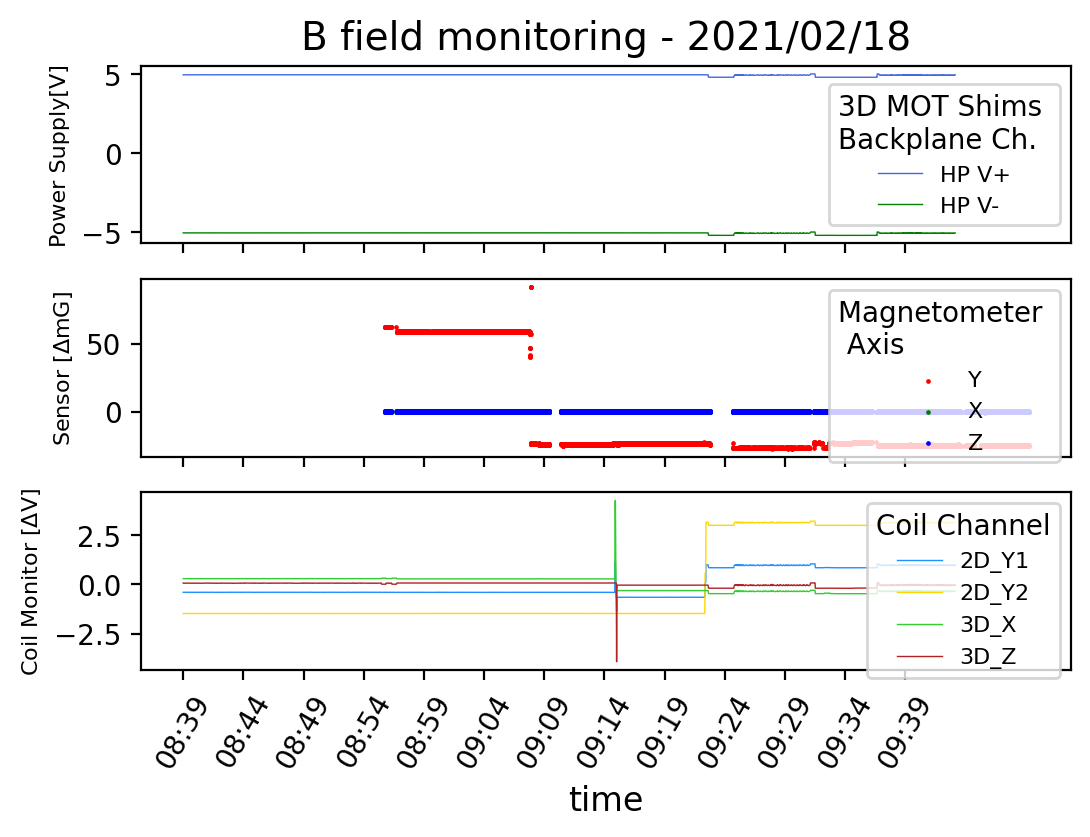

In [59]:
## subplotify
fig,(ax,ax2,ax3) = plt.subplots(3,1,dpi=200,sharex=True)
yfontsize = 8
legfontsize = 8
# colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
colors = ['royalblue','green']
labels = ['3D_X', 'HP V+', '3D_Z', 'HP V-', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows1,labels1 = array(sorted(ydatatuples, key=lambda x: x[1])).T
ydatarows = ydatarows1[-2:]
labels = labels1[-2:]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 3600/12
units = 1 #[2370,9000] # mG per V at atoms 

slicy=[53000,-1]#20000]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Power Supply[V]",fontsize=yfontsize)
# ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
slicy = [0,-1]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)


# ax2.set_xlabel("time",fontsize=12)
# # ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
# ax2.set_xticks(xticks)
# ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# # ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=yfontsize)
# ax2.set_ylim((-20,20))

ax.legend(title="3D MOT Shims \nBackplane Ch.", loc='center right', fontsize=legfontsize)
ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
labels = ['3D_X', 'HP V+', '3D_Z', 'HP V-', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
# ydatatuples = list(zip(coilrows[1:], labels))
# ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1]),dtype=object).T
ydatarows = ydatarows1[:4]
labels = labels1[:4]
colors = colors[:4]
widths = [0.5]*len(colors)

assert len(colors) == len(labels)
assert len(labels) ==len(widths)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 3600/12
units = 1 #[2370,9000] # mG per V at atoms 

slicy=[53000,-1]

plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax3,yunits=units,yfunc=variance)#percentage_change)
ax3.set_xlabel("time",fontsize=12)
ax3.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax3.set_xticks(xticks)
ax3.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
ax3.set_ylabel(r"Coil Monitor [$\Delta$V]",fontsize=yfontsize)
# ax.set_ylim((-1,1))
ax3.legend(title="Coil Channel", loc='upper right', fontsize=legfontsize)


# fname = "3Dcoilpower_bsensor_2Dy1y2_3Dxz_20210218_839_939.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [52]:
len(ydatarows[0])

55558

In [14]:
datatuples[0][1][5:]

['2D_X1', '2D_X2']

In [98]:
labels

array(['2D_Y1', '2D_Y2', '3D_X', '3D_Z', 'HP V+', 'HP V-'], dtype=object)

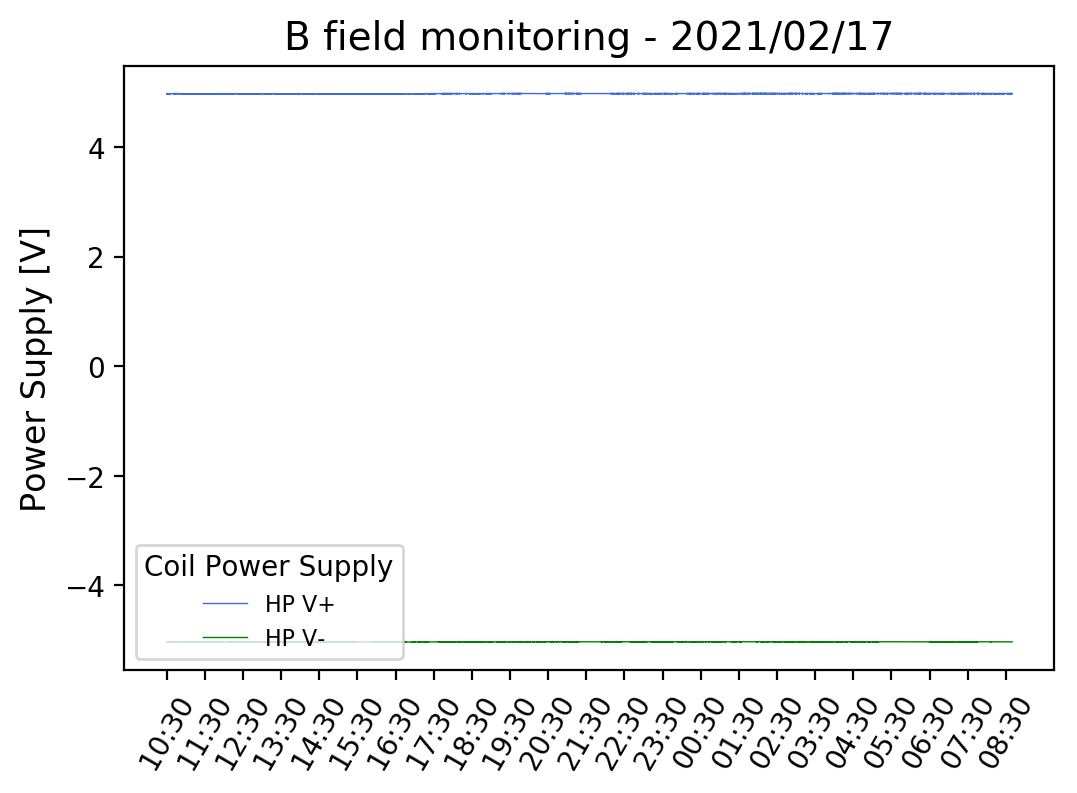

In [118]:
## subplotify
fig,ax = plt.subplots(1,1,dpi=200,sharex=True)
legfontsize = 8
# colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
colors = ['royalblue','green']
labels = ['3D_X', 'HP V+', '3D_Z', 'HP V-', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
ydatarows = ydatarows[-2:]
labels = labels[-2:]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 1*3600
units = 1#[2370,9000] # mG per V at atoms 

slicy=[0, 53000]
# slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Power Supply [V]",fontsize=12)

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax2.set_ylim((-20,20))

ax.legend(title="Coil Power Supply", loc='lower left', fontsize=legfontsize)
# ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

# fname = "coils_powersupply_v_20210218.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [96]:
len(list(coilrows[1]) + list(coilrows[3]))

111116

In [91]:
type(coilrows)

numpy.ndarray

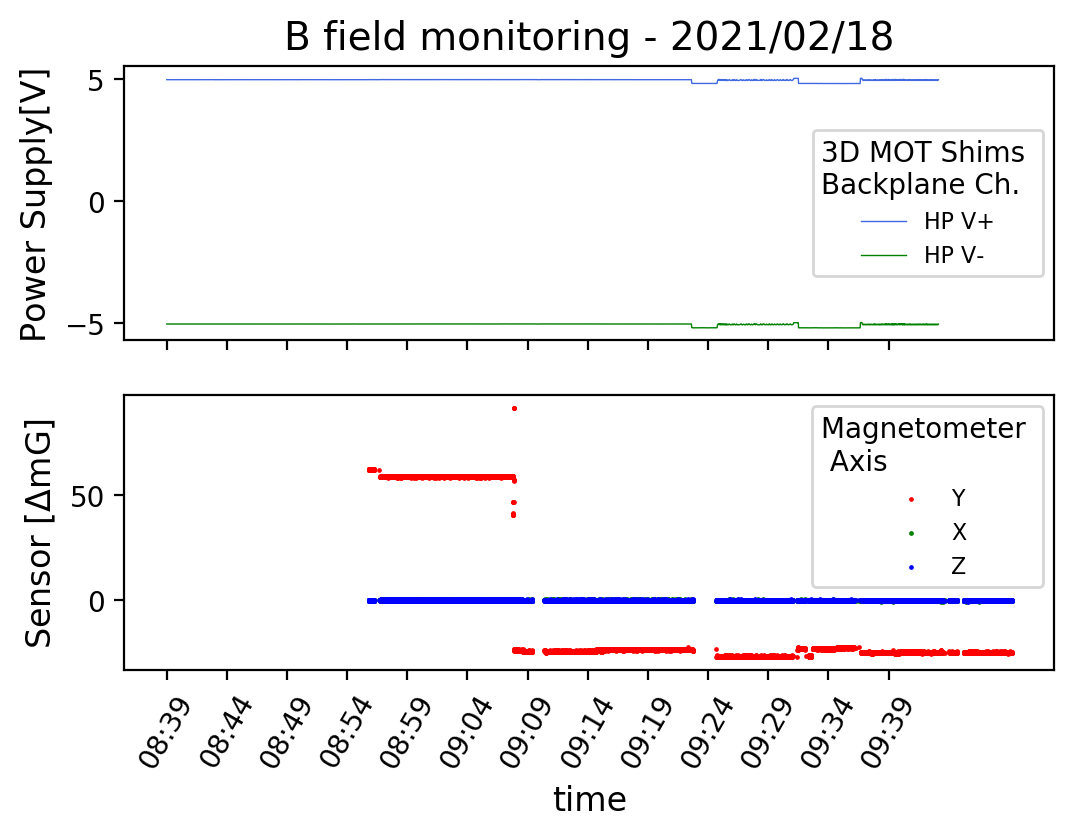

In [133]:
## subplotify
fig,(ax,ax2) = plt.subplots(2,1,dpi=200,sharex=True)
legfontsize = 8
# colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
colors = ['royalblue','green']
labels = ['3D_X', 'HP V+', '3D_Z', 'HP V-', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
ydatarows = ydatarows[-2:]
labels = labels[-2:]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
xdata = to_unix(coilrows[0])
xstep = 3600/12
units = 1 #[2370,9000] # mG per V at atoms 

slicy=[53000,-1]#20000]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units)#,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Power Supply[V]",fontsize=12)
# ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
slicy = [0,-1]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)


ax2.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax2.set_xticks(xticks)
ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=12)
# ax2.set_ylim((-20,20))

ax.legend(title="3D MOT Shims \nBackplane Ch.", loc='center right', fontsize=legfontsize)
ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

# fname = "power_supply_20210218_839_939.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

## 2020.02.17

In [ ]:
# As of 10:30 AM today, monitoring the backplane of the 3D MOT coil driver cage 
# X1 channel is +5V rail
# X2 channel is -5V rail

## 2020.02.16

In [82]:
files = ["rb_coils20210216_345pm.csv","rb_fields20210216_345pm.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows,senserows = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1], datatuples[1][1]

(['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2'],
 ['measurement_time', '1', '0', '2'])

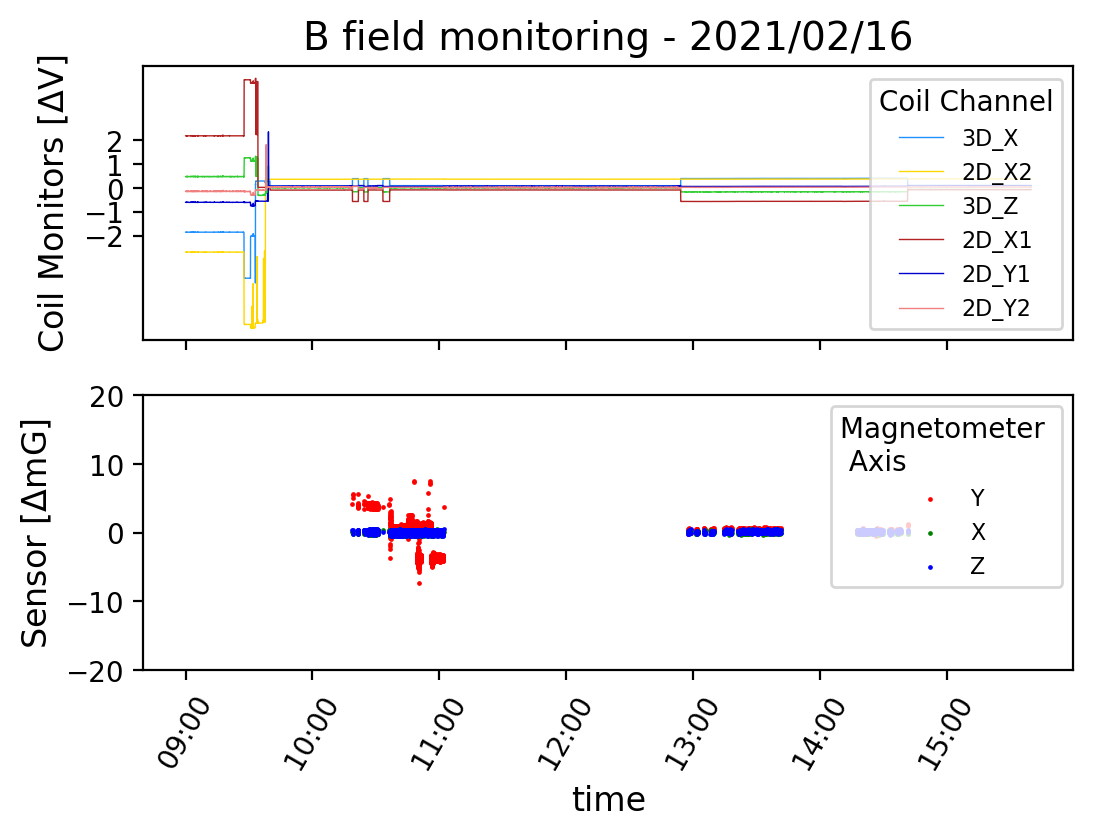

In [84]:
## subplotify
fig,(ax,ax2) = plt.subplots(2,1,dpi=200,sharex=True)
legfontsize = 8
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
# labels = datatuples[0][1][1:]
# widths = [0.5]*len(colors)
# plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
# ydatarows = coilrows[1:]
labels = ['3D_X', '2D_X1', '3D_Z', '2D_X2', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
xdata = to_unix(coilrows[0])
xstep = 1*3600
units = 1#[2370,9000] # mG per V at atoms 

slicy=[0, -1]#20000]
# slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Coil Monitors [$\Delta$V]",fontsize=12)
ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
# slicy = [0,32500]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)


ax2.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax2.set_xticks(xticks)
ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=12)
ax2.set_ylim((-20,20))

ax.legend(title="Coil Channel", loc='lower right', fontsize=legfontsize)
ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

# fname = "coils_deltav_sensor_deltab_20210213_1155_1955.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

## 2020.02.15

In [135]:
files = ["coilmonitor20210215.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows, = [array(dtuple[0]).T for dtuple in datatuples]
len(coilrows)
datatuples[0][1]

['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2']

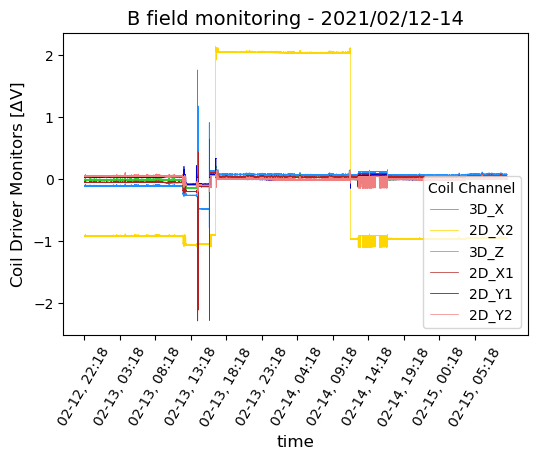

In [136]:
fig,ax = plt.subplots(dpi=100)
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
# labels = datatuples[0][1][1:]
# widths = [0.5]*len(colors)
# plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
# ydatarows = exprows[1:]
labels = ['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
xdata = to_unix(coilrows[0])
xstep = 5*3600
xticks = [xdata[0] + xstep*i for i in range(int((xdata[-1]-xdata[0])/xstep+0.5))]

units = 1 # 

# slicy=[0, 90000]
slicy=[0,-1]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}-14",fontsize=14)
ax.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel(r"Coil Driver Monitors [$\Delta$V]",fontsize=12)

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_dayhrmin(x) for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Coil Channel", loc='lower right')
# fname = "coil_monitoring_deltavoltage_20210213_15.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [109]:
files = ["rb_coilmonitor20210215.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
exprows, = [array(dtuple[0]).T for dtuple in datatuples]
len(exprows)
datatuples[0][1]

['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2']

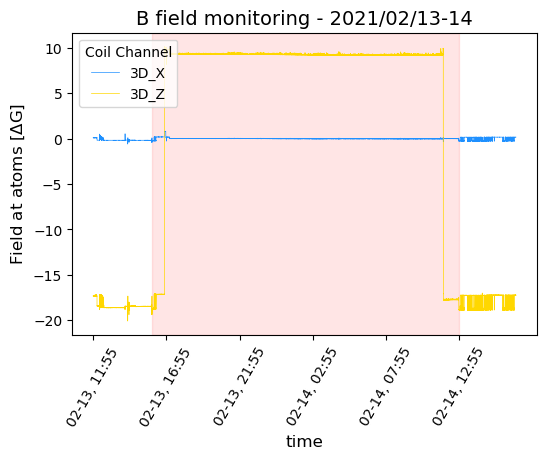

In [127]:
fig,ax = plt.subplots(dpi=100)
colors = ['dodgerblue','gold']#,'limegreen','firebrick','mediumblue','lightcoral']
labels = datatuples[0][1][1:3]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = exprows[1:3]
xdata = to_unix(exprows[0])
xstep = 5*3600
xticks = [xdata[0] + xstep*i for i in range(int((xdata[-1]-xdata[0])/xstep+0.5))]

units = [2.37,9] # G per V at atoms 

# slicy=[0, 90000]
slicy=[0,-1]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}-14",fontsize=14)
ax.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel(r"Field at atoms [$\Delta$G]",fontsize=12)
ax.axvspan(xdata[9547],xdata[59774], alpha=0.1, color='red')


ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_dayhrmin(x) for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Coil Channel", loc='upper left')
# fname = "coil_monitoring_3DXZ_deltab_20210213_14.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [60]:
files = ["rb_coilmonitor20210215.csv","rb_bfields_20210212_15.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows,senserows = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1], datatuples[1][1]

(['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2'],
 ['measurement_time', '1', '0', '2'])

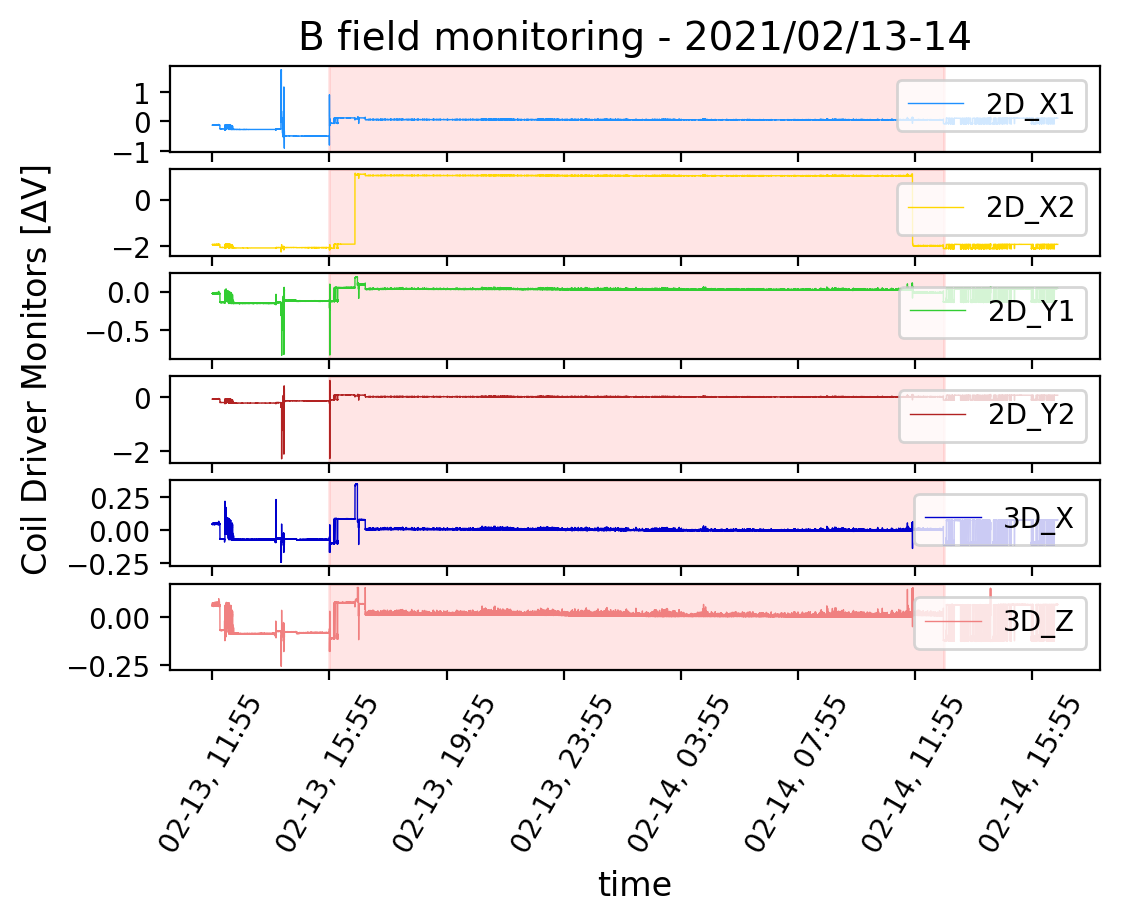

In [138]:
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
fig,axes = plt.subplots(len(colors),1,dpi=200,sharex=True)

labels = ['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
xdata = to_unix(coilrows[0])
xstep = 4*3600
units = 1 #[2370,9000] # mG per V at atoms 

# slicy=[35000, 50000]
slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
for ydata,ax,c,l,lw in zip(ydatarows,axes,colors,labels,widths):
    plt_kwargs = [{"color":c,"label":l,"linewidth":lw}]
    plot_multi_line(xdata,[ydata],plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
    ax.legend(loc='upper right')
    ax.axvspan(xdata[9547],xdata[59774], alpha=0.1, color='red')
axes[0].set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}-14",fontsize=14)
axes[-1].set_xlabel("time",fontsize=12)
axes[-1].set_xticks(xticks)
axes[-1].set_xticklabels([unix_to_dayhrmin(x) for x in xticks], rotation=60)
fig.text(0.0, 0.5, r"Coil Driver Monitors [$\Delta$V]",fontsize=12, va='center', rotation='vertical')

# fname = "coils_deltavoltage_subplots_20210213_14_1155_1555.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [73]:
labels = ['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]

In [74]:
ydatatuples = list(zip(coilrows[1:], labels))
ydatatuples

[(array([-0.363522, -0.364069, -0.360149, ..., -0.33255 , -0.331476,
         -0.331582]), '3D_X'),
 (array([-3.05687, -3.06098, -3.06059, ..., -3.04885, -3.04781, -3.04682]),
  '2D_X2'),
 (array([-0.0964901, -0.094638 , -0.0961814, ..., -0.0880494, -0.0878114,
         -0.0882069]), '3D_Z'),
 (array([-2.18867, -2.19006, -2.18911, ..., -1.95218, -1.9516 , -1.95326]),
  '2D_X1'),
 (array([0.578716, 0.5775  , 0.578854, ..., 0.646145, 0.648219, 0.64909 ]),
  '2D_Y1'),
 (array([2.16561, 2.16472, 2.16419, ..., 2.31451, 2.314  , 2.31462]), '2D_Y2')]

In [75]:
sorted(ydatatuples, key=lambda tupel: tupel[1])

[(array([-2.18867, -2.19006, -2.18911, ..., -1.95218, -1.9516 , -1.95326]),
  '2D_X1'),
 (array([-3.05687, -3.06098, -3.06059, ..., -3.04885, -3.04781, -3.04682]),
  '2D_X2'),
 (array([0.578716, 0.5775  , 0.578854, ..., 0.646145, 0.648219, 0.64909 ]),
  '2D_Y1'),
 (array([2.16561, 2.16472, 2.16419, ..., 2.31451, 2.314  , 2.31462]), '2D_Y2'),
 (array([-0.363522, -0.364069, -0.360149, ..., -0.33255 , -0.331476,
         -0.331582]), '3D_X'),
 (array([-0.0964901, -0.094638 , -0.0961814, ..., -0.0880494, -0.0878114,
         -0.0882069]), '3D_Z')]

In [68]:
sorted(labels)

['2D_X1', '2D_X2', '2D_Y1', '2D_Y2', '3D_X', '3D_Z']

In [60]:
student_tuples = [
('john', 'A', 15),
('jane', 'B', 12),
('dave', 'B', 10),
]
sorted(student_tuples, key=lambda student: student[2])   # sort by age

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [59]:
ydatarows[0] == coilrows[1:][0]

array([ True,  True,  True, ...,  True,  True,  True])

In [52]:
len(coilrows[1:]), len(labels)
len(list())

6

In [110]:
# for i,x in enumerate(xdata):
#     if x > dt_to_unix(DT(2021,2,13,15,55))+6*3600:
#         print(i, x)
#         break
for i,x in enumerate(xdata):
    if x > dt_to_unix(DT(2021,2,14,12,55))+6*3600:
        print(i, x)
        break


59774 1613328900.9589076


In [111]:
unix_to_dt(xdata[59774]), unix_to_dt(dt_to_unix(DT(2021,2,14,12,55))+6*3600)

('2021-02-14 12:55:00', '2021-02-14 12:55:00')

In [89]:
len(xdata), len(xdata < (dt_to_unix(DT(2021,2,13,15,55)) - 7.8*60))

(69037, 69037)

In [30]:
long(senserows[0][0]-8*60*2**32),long(senserows[0][-1]-8*60*2**32)

(6928808443248866304, 6929254747761748992)

<ipython-input-64-4dac2ead4716>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T


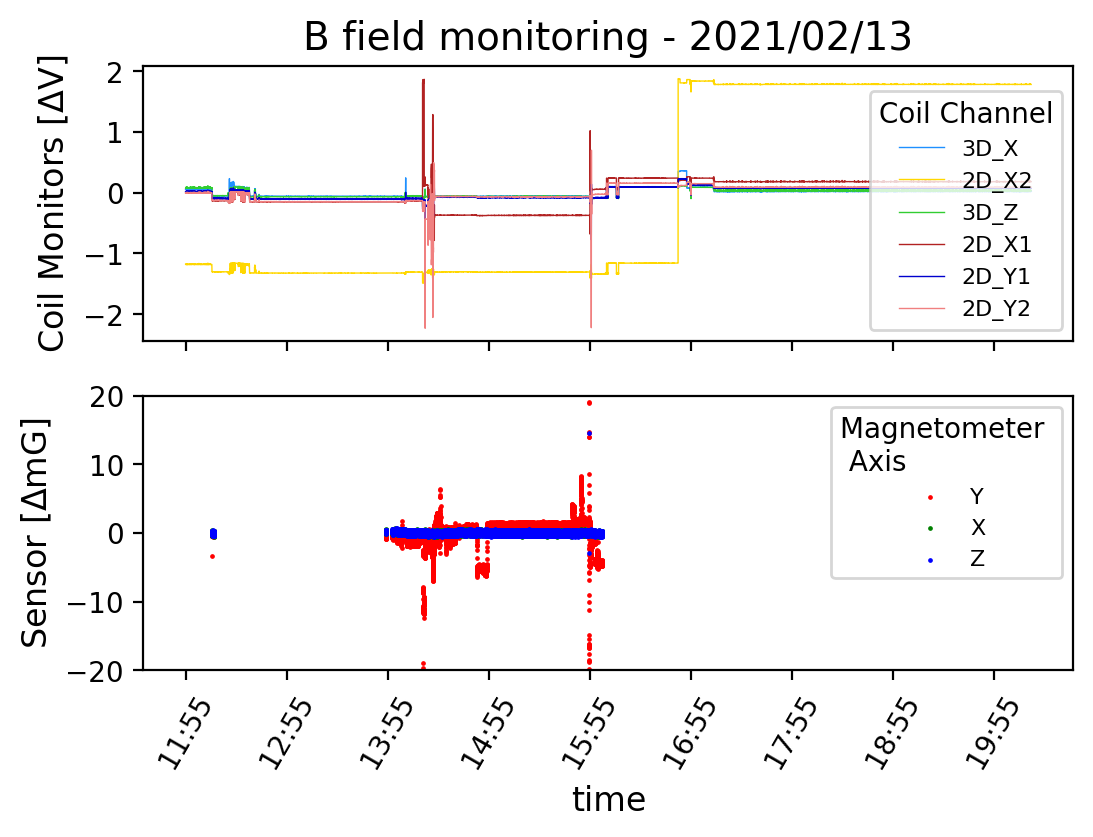

In [64]:
## subplotify
fig,(ax,ax2) = plt.subplots(2,1,dpi=200,sharex=True)
legfontsize = 8
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
labels = ['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
ydatarows = coilrows[1:]
xdata = to_unix(coilrows[0])
xstep = 1*3600
units = 1#[2370,9000] # mG per V at atoms 

slicy=[0, 20000]
# slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Coil Monitors [$\Delta$V]",fontsize=12)
ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
slicy = [0,32500]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)


ax2.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax2.set_xticks(xticks)
ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=12)
ax2.set_ylim((-20,20))

ax.legend(title="Coil Channel", loc='lower right', fontsize=legfontsize)
ax2.legend(title="Magnetometer \n Axis", loc='upper right', fontsize=legfontsize)

# fname = "coils_deltav_sensor_deltab_20210213_1155_1955.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [48]:
# long(senserows[0][0])-long(senserows[0][-1])
len(senserows[0])

34406

In [ ]:
# need to do experiment to see if the coil and sensor data get logged with a weird relative time delay
#lasttime 6929256809346051072
    #end of shim scans 6929256809346051072 and 6929633775674978304

In [336]:
long(6929633775674978304+8*2**32)

6929638929635733504

In [335]:
unix_to_hrmin(to_unix(6929633775674978304),':'), unix_to_hrmin(to_unix(long(6929633775674978304+8*60*2**32)),':')

('17:18', '17:26')

In [65]:
files = ["yxzshimscancoils20210215.csv","yxzshimscanfields20210215.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
coilrows,senserows = [array(dtuple[0]).T for dtuple in datatuples]
datatuples[0][1], datatuples[1][1]

(['measurement_time', '3D_X', '3D_Z', '2D_Y2', '2D_Y1', '2D_X1', '2D_X2'],
 ['measurement_time', '1', '0', '2'])

<ipython-input-66-706aff5e3b30>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T


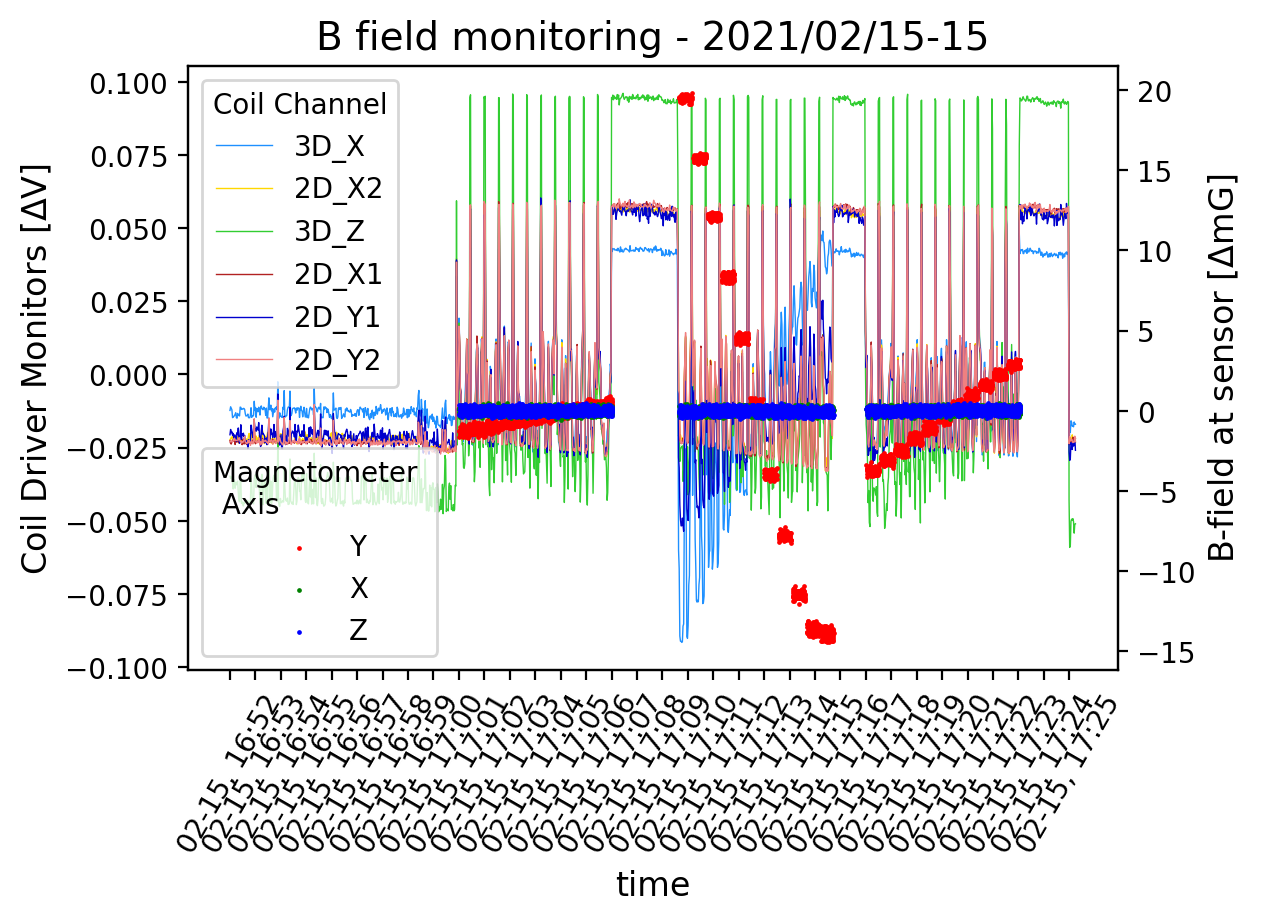

In [66]:
fig,ax = plt.subplots(dpi=200)
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
labels = ['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
ydatarows = coilrows[1:]
xdata = to_unix(coilrows[0])
xstep = 3600/60
units = 1 #[2370,9000] # mG per V at atoms 

slicy=[57300, -1]
# slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+1))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}-15",fontsize=14)
ax.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel(r"Coil Driver Monitors [$\Delta$V]",fontsize=12)
ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_dayhrmin(x) for x in xticks], rotation=60)
# ax.set_ylim((-1,1))


ax2 = ax.twinx()

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
slicy = [10,-1]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)

ax2.set_ylabel(r"B-field at sensor [$\Delta$mG]",fontsize=12)
# ax2.set_ylim((-20,20))

ax.legend(title="Coil Channel", loc='upper left')
ax2.legend(title="Magnetometer \n Axis", loc='lower left')

# fname = "coils_deltavoltage_sensor_deltab_20210213_15_1256_1756.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [292]:
len(coilrows[0])

58308

<ipython-input-67-da0639328974>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T


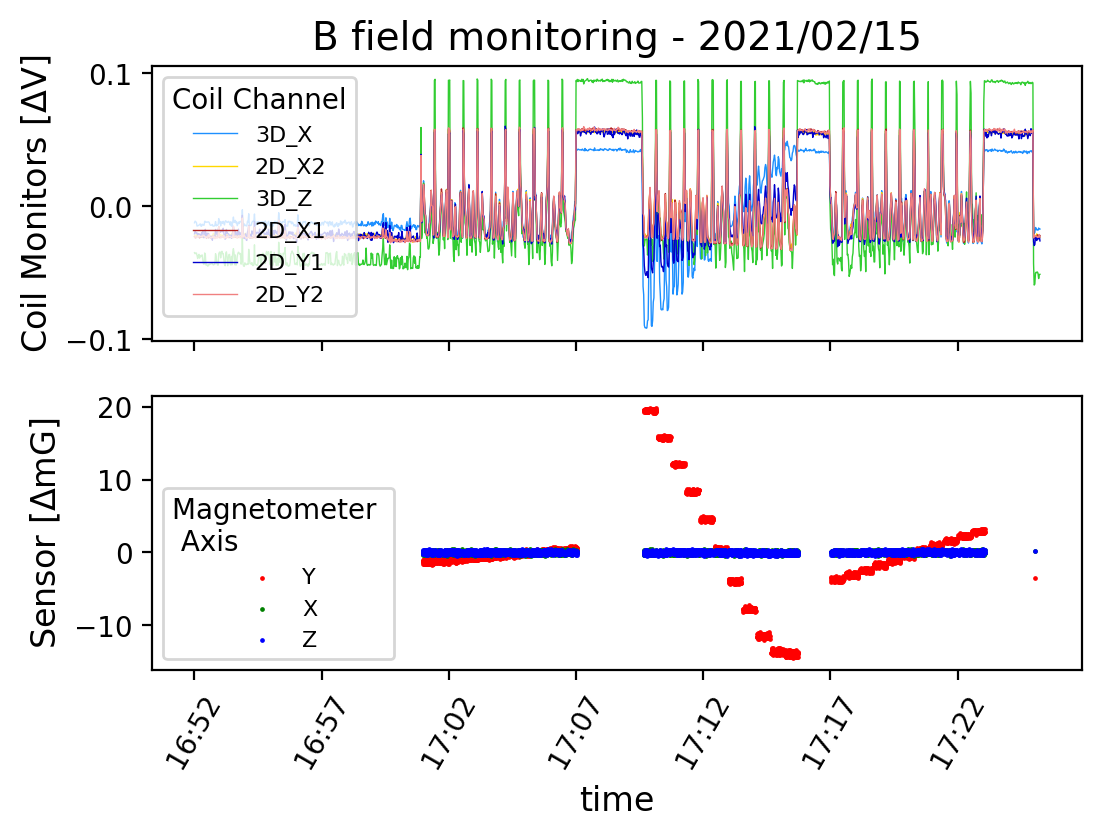

In [67]:
## subplotify
fig,(ax,ax2) = plt.subplots(2,1,dpi=200,sharex=True)
legfontsize = 8
colors = ['dodgerblue','gold','limegreen','firebrick','mediumblue','lightcoral']
labels = ['3D_X', '2D_X2', '3D_Z', '2D_X1', '2D_Y1', '2D_Y2'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatatuples = list(zip(coilrows[1:], labels))
ydatarows,labels = array(sorted(ydatatuples, key=lambda x: x[1])).T
ydatarows = coilrows[1:]
xdata = to_unix(coilrows[0])
xstep = 3600/12
units = 1#[2370,9000] # mG per V at atoms 

slicy=[57300, -1]
# slicy=[0,-1]

xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep+0.5))]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_ylabel(r"Coil Monitors [$\Delta$V]",fontsize=12)
# ax.set_yticks([-2,-1,0,1,2])
# ax.set_ylabel(r"At atoms [$\Delta$mG]",fontsize=12)
# ax.set_yticks([-1000,-500,0,500,1000])

colors = ['r','g','b']
labels = ['Y','X','Z']
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = senserows[1:]
xdata = to_unix(senserows[0])+7.75*60
units = 350 # mG per V at sensor
slicy = [2,16000]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax2,yunits=units,yfunc=variance)#percentage_change)


ax2.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax2.set_xticks(xticks)
ax2.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax2.set_ylabel(r"Sensor [$\Delta$mG]",fontsize=12)
# ax2.set_ylim((-20,20))

ax.legend(title="Coil Channel", loc='upper left',fontsize=8)
ax2.legend(title="Magnetometer \n Axis", loc='lower left',fontsize=8)

# fname = "coils_deltav_sensor_deltab_20210215_1652_1722.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [161]:
files = ["xyzshimscan_20210211.csv"]
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file
exprows, = [array(dtuple[0]).T for dtuple in datatuples]
len(exprows)
datatuples[0][1]

['measurement_time', '1', '0', '2']

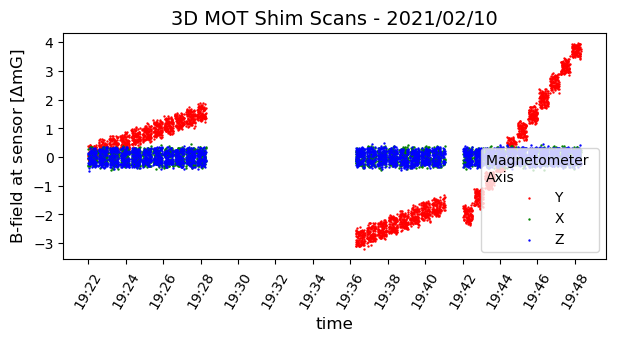

In [163]:
fig,ax = plt.subplots(dpi=100,figsize=(7,3))
colors = ['r','g','b']
labels = ['Y','X','Z'] #datatuples[0][1][1:]
widths = [0.5]*len(colors)
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = exprows[1:]
xdata = to_unix(exprows[0])
xstep = 3600/30
units = 350 # [mG]; 35 uT/V, 100 uT/G

# slicy=[1260, 2374] # first scan
# xdata1 = range(slicy1[0]-slicy1[-1])

# slicy=[2375,-1] # second scan
slicy=[1260, -1]
# xdata2 = range(slicy2[0]-slicy2[-1])
xticks = [xdata[slicy[0]] + xstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/xstep-0.5))]

# slicy=[0,-1]
scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,yunits=units,yfunc=variance)#percentage_change)

ax.set_title(f"3D MOT Shim Scans - {unix_to_date(xdata[slicy[0]],'/')}",fontsize=14)
ax.set_xlabel("time",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel(r"B-field at sensor [$\Delta$mG]",fontsize=12)

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Magnetometer \nAxis", loc='lower right')
# fname = "shimscan_deltabfield_{unix_to_date(xdata[slicy[0]],'_')}.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

## 2020.02.08

In [119]:
# time when I last did a measurement analysis 6922865546762882048
# last time step today 6926271587366279168

# about a week between analyses, so 
dt = 6926271587366279168 - 6922865546762882048
# tsteps_to_msec = 7*24*3600*1000/dt 

In [121]:
DT.utcfromtimestamp(6926271587366279168/(2**32)).strftime(
    '%Y-%m-%d %H:%M:%S')

'2021-02-06 21:51:11'

In [3]:
files = ["rb_bfields_20210208.csv"]

In [4]:
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file

In [5]:
exprows, = [array(dtuple[0]).T for dtuple in datatuples]
len(exprows)

4

In [6]:
datatuples[0][1]

['measurement_time', '1', '0', '2']

In [7]:
int(len(datarows[0]/8))

NameError: name 'datarows' is not defined

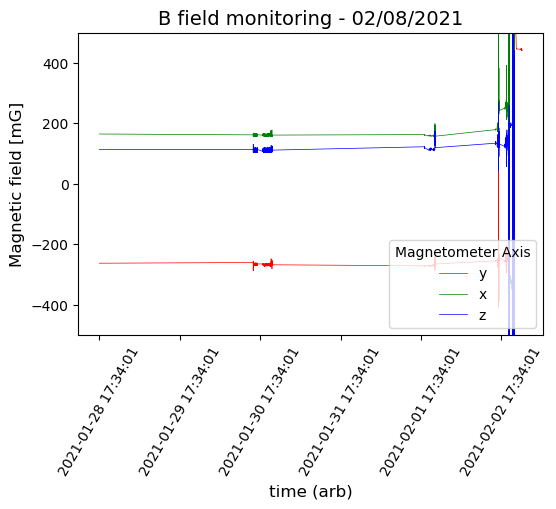

In [22]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = exprows[1:]
xdata = to_unix(exprows[0])
xstep = 24*3600
xticks = [xdata[0] + xstep*i for i in range(int((xdata[-1]-xdata[0])/xstep-0.5)-2)]

mGperV = 350 # [mG]; 35 uT/V, 100 uT/G

# slicy=[0, 90000]
# slicy=[0,-1]
plot_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,
                yunits=mGperV,yfunc=variance)#percentage_change)
ax.set_title("B field monitoring - 02/08/2021",fontsize=14)
ax.set_xlabel("time (arb)",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel("Magnetic field [mG]",fontsize=12)
ax.set_ylim((-500,500))

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_dt(x) for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Magnetometer Axis", loc='lower right')
# fname = "bfield_monitoring_deltavoltage_20210129.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

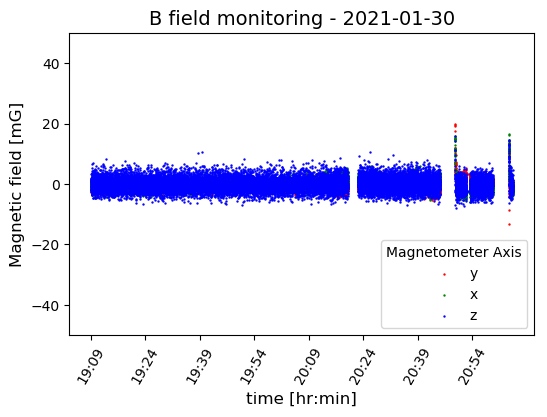

In [108]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = exprows[1:]
xdata = to_unix(exprows[0])

mGperV = 350 # [mG]; 35 uT/V, 100 uT/G

# slicy=[100000, -1]
slicy =[20000,36000]
# slicy=[0,-1]

scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,
                yunits=mGperV,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]])}",fontsize=14)
ax.set_xlabel("time [hr:min]",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel("Magnetic field [mG]",fontsize=12)
ax.set_ylim((-50,50))

tickstep = 0.25*3600
xticks = [xdata[slicy[0]] + tickstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/tickstep + 0.5))]

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Magnetometer Axis", loc='lower right')
fname = f"bfield_monitoring_{unix_to_date(xdata[slicy[0]])}_{unix_to_hrmin(xticks[0],'_')}_{unix_to_hrmin(xticks[-1],'_')}.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

bfield_monitoring_2021-02-02_16_17_16_52.png


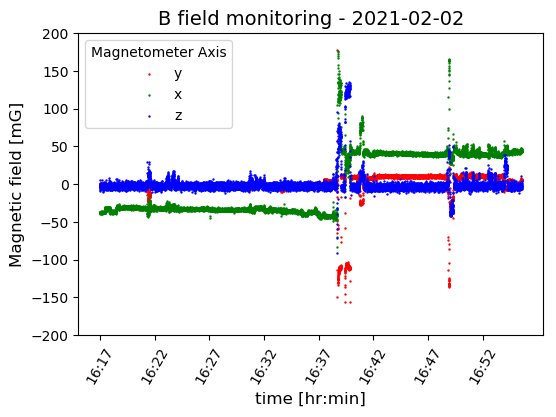

In [111]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = exprows[1:]
xdata = to_unix(exprows[0])

mGperV = 350 # [mG]; 35 uT/V, 100 uT/G

slicy=[37010, 47100]
# slicy =[0,-1]
# slicy=[0,-1]

scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,
                yunits=mGperV,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]])}",fontsize=14)
ax.set_xlabel("time [hr:min]",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel("Magnetic field [mG]",fontsize=12)
ax.set_ylim((-200,200))

tickstep = 5*3600/60
xticks = [xdata[slicy[0]] + tickstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/tickstep + 0.5))]

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Magnetometer Axis", loc='upper left')
fname = f"bfield_monitoring_{unix_to_date(xdata[slicy[0]])}_{unix_to_hrmin(xticks[0],'_')}_{unix_to_hrmin(xticks[-1],'_')}.png"
# print(fname)
# plt.savefig(fname, bbox_inches='tight')
plt.show()

bfield_monitoring_2021-02-02_16_17_16_52.png


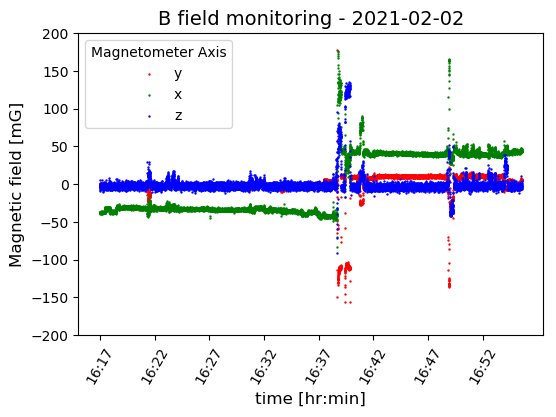

In [111]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = exprows[1:]
xdata = to_unix(exprows[0])

mGperV = 350 # [mG]; 35 uT/V, 100 uT/G

slicy=[37010, 47100]
# slicy =[0,-1]
# slicy=[0,-1]

scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,
                yunits=mGperV,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]])}",fontsize=14)
ax.set_xlabel("time [hr:min]",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel("Magnetic field [mG]",fontsize=12)
ax.set_ylim((-200,200))

tickstep = 5*3600/60
xticks = [xdata[slicy[0]] + tickstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/tickstep + 0.5))]

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Magnetometer Axis", loc='upper left')
fname = f"bfield_monitoring_{unix_to_date(xdata[slicy[0]])}_{unix_to_hrmin(xticks[0],'_')}_{unix_to_hrmin(xticks[-1],'_')}.png"
# print(fname)
# plt.savefig(fname, bbox_inches='tight')
plt.show()

bfield_monitoring_2021-02-02_18_42_20_42.png


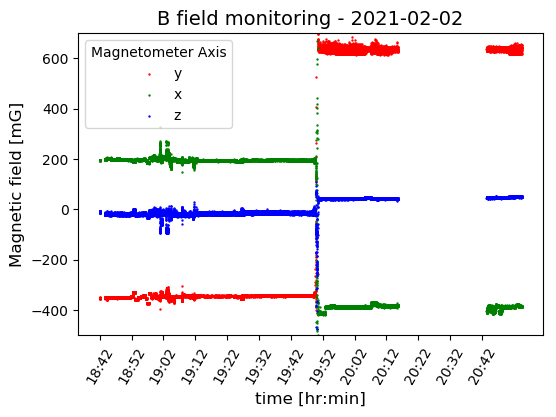

In [126]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"s":lw} for c,l,lw in zip(colors,labels,widths)]
ydatarows = exprows[1:]
xdata = to_unix(exprows[0])

mGperV = 350 # [mG]; 35 uT/V, 100 uT/G

slicy=[47200,73000]
# slicy =[0,-1]
# slicy=[0,-1]

scatter_multi_line(xdata,ydatarows,plt_kwargs,slices=slicy,ax=ax,
                yunits=mGperV,yfunc=variance)#percentage_change)
ax.set_title(f"B field monitoring - {unix_to_date(xdata[slicy[0]])}",fontsize=14)
ax.set_xlabel("time [hr:min]",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel("Magnetic field [mG]",fontsize=12)
ax.set_ylim((-500,700))

tickstep = 3600/6
xticks = [xdata[slicy[0]] + tickstep*i for i in range(int((xdata[slicy[-1]]-xdata[slicy[0]])/tickstep + 0.5))]

ax.set_xticks(xticks)
ax.set_xticklabels([unix_to_hrmin(x,':') for x in xticks], rotation=60)
# ax.set_ylim((-1,1))

ax.legend(title="Magnetometer Axis", loc='upper left')
fname = f"bfield_monitoring_{unix_to_date(xdata[slicy[0]])}_{unix_to_hrmin(xticks[0],'_')}_{unix_to_hrmin(xticks[-1],'_')}.png"
print(fname)
plt.savefig(fname, bbox_inches='tight')
plt.show()

## 2020.01.29

In [38]:
files = ["xshim_scan_20210127.csv","yshim_scan_20210128.csv","zshim_scan_20210128.csv","rb_bfields_20210127.csv"]

In [39]:
datatuples = [read_csv(f) for f in files] # the data,label pairs for each file

In [40]:
xscanrows,yscanrows,zscanrows,exprows = [array(dtuple[0]).T for dtuple in datatuples]

In [43]:
xscanrows[1][:5]

array([-1.95309742, -1.95093413, -1.95288109, -1.95385457, -1.95136678])

In [6]:
datatuples[0][1]

['measurement_time', '1', '0', '2']

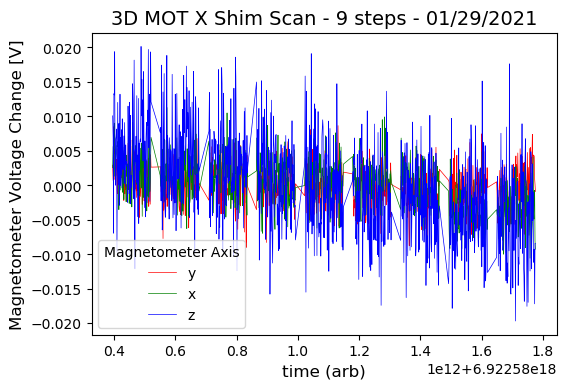

In [236]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
datarows = xscanrows

slicy=[23595, -1] 
# slicy=[0,-1]
plot_multi_line(datarows[0],datarows[1:],plt_kwargs,slices=slicy,ax=ax,yfunc=variance)#percentage_change)
ax.set_title("3D MOT X Shim Scan - 9 steps - 01/29/2021",fontsize=14)
ax.set_xlabel("time (arb)",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel("Magnetometer Voltage Change [V]",fontsize=12)
ax.legend(title="Magnetometer Axis")
# fname = "xshim_scan_9_steps_deltavoltage_20210129.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

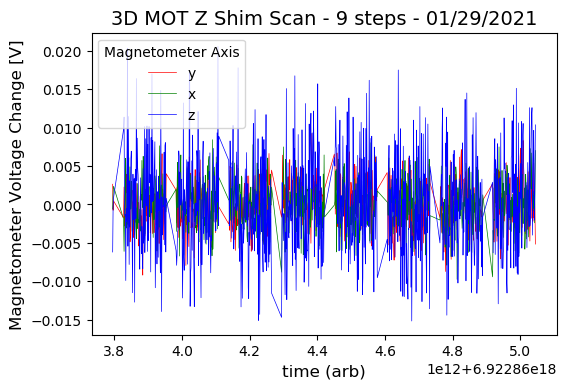

In [243]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
datarows = zscanrows

slicy=[100, -1]#int(0.54*len(datarows[0])),-1]
i += 1
plot_multi_line(datarows[0],datarows[1:],plt_kwargs,slices=slicy,ax=ax,yfunc=variance)#percentage_change)
ax.set_title("3D MOT Z Shim Scan - 9 steps - 01/29/2021",fontsize=14)
ax.set_xlabel("time (arb)",fontsize=12)
# ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
ax.set_ylabel("Magnetometer Voltage Change [V]",fontsize=12)
ax.legend(title="Magnetometer Axis")
# fname = "zshim_scan_9_steps_deltavoltage_20210129.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

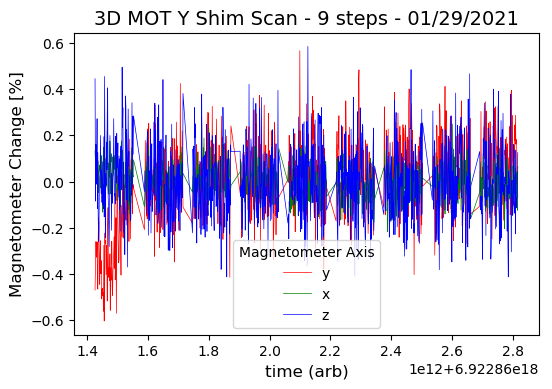

In [262]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
datarows = yscanrows

slicy=[1, -1]#int(0.54*len(datarows[0])),-1]
i += 1
plot_multi_line(datarows[0],datarows[1:],plt_kwargs,slices=slicy,ax=ax,yfunc=percentage_change)
ax.set_title("3D MOT Y Shim Scan - 9 steps - 01/29/2021",fontsize=14)
ax.set_xlabel("time (arb)",fontsize=12)
ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
# ax.set_ylabel("Magnetometer Voltage Change [V]",fontsize=12)
ax.legend(title="Magnetometer Axis")
# fname = "yshim_scan_9_steps_percentage_20210129.png"
# plt.savefig(fname, bbox_inches='tight')
plt.show()

In [11]:
# this is a lot of data, so let's cut-out some of it
compress = lambda pts, comp: array([pts[i+comp] for i in range(int(len(pts)/comp))])

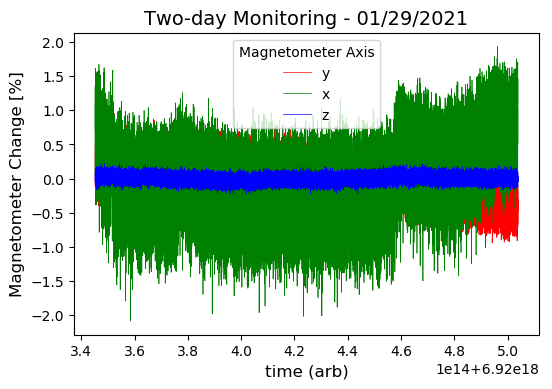

In [25]:
fig,ax = plt.subplots(dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
widths = [0.5,0.5,0.5]
plt_kwargs = [{"color":c,"label":l,"linewidth":lw} for c,l,lw in zip(colors,labels,widths)]
datarows = [compress(row,5) for row in exprows]

slicy=[0, -1]
plot_multi_line(datarows[0],datarows[1:],plt_kwargs,slices=slicy,ax=ax,yfunc=percentage_change)#variance)
ax.set_title("Two-day Monitoring - 01/29/2021",fontsize=14)
ax.set_xlabel("time (arb)",fontsize=12)
ax.set_ylabel("Magnetometer Change [%]",fontsize=12)
# ax.set_ylabel("Magnetometer Voltage Change [V]",fontsize=12)
ax.legend(title="Magnetometer Axis")
# ax.set_ylim((-.010,.010))
fname = "two_day_monitoring_percentage_20210129.png"
plt.savefig(fname, bbox_inches='tight')
plt.show()

In [22]:
len(datarows[0])

127877

In [275]:
550000/(900*12)

50.925925925925924

In [78]:
int(0.54*len(datarows[0]))

13237

In [57]:
len(datarows[0][slicy[0]:slicy[1]])

12256

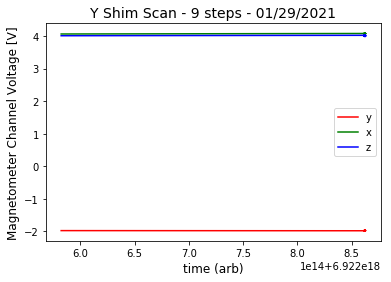

In [38]:
fig,ax = plt.subplots() #dpi=100)
colors = ['r','g','b']
labels = ['y','x','z']
plt_kwargs = [{"color":c,"label":l} for c,l in zip(colors,labels)] 
plot_multi_line(yscanrows[0],yscanrows[1:],plt_kwargs,ax=ax)
ax.set_title("Y Shim Scan - 9 steps - 01/29/2021",fontsize=14)
ax.set_xlabel("time (arb)",fontsize=12)
ax.set_ylabel("Magnetometer Channel Voltage [V]",fontsize=12)
plt.show()

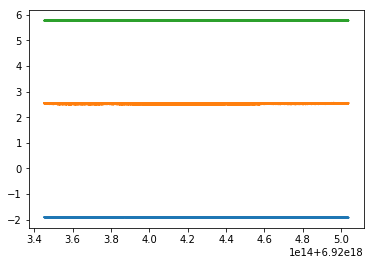

In [58]:
# plot compressed data
comp = 5
plt.plot([tpts[i+comp] for i in range(int(len(tpts)/comp))],
         [rows[1][i+comp] for i in range(int(len(tpts)/comp))])

plt.plot([tpts[i+comp] for i in range(int(len(tpts)/comp))],
         [rows[2][i+comp] for i in range(int(len(tpts)/comp))])

plt.plot([tpts[i+comp] for i in range(int(len(tpts)/comp))],
         [rows[3][i+comp] for i in range(int(len(tpts)/comp))])

In [73]:
tpts[-1]

'6922483830225895424'

In [62]:
means = [mean(r) for r in rows[1:]]
stds = [std(r) for r in rows[1:]]
means, stds

([-1.9284595474932988, 2.6242263361509086, 5.688120764038376],
 [0.04707247392237877, 0.318257594611526, 0.3811428085014817])

In [64]:
tpts[-1] < 
6922582275759697920
6922483830225895000

True

In [ ]:
# last time before y scan 6922582275759697920
# after y scan 6922862817693417472
# after z scan 6922865546762882048